In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.to_string)

<bound method DataFrame.to_string of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                              

In [18]:
x = df.drop(columns = ['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'])
y = df['Survived']
print(x)
print(y)

     Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [35]:
print(x.isna().sum())

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64


In [36]:
newdf = pd.get_dummies(x,dtype=int)
print(newdf.to_string())

     Pclass    Age      Fare  Sex_female  Sex_male
0         3  22.00    7.2500           0         1
1         1  38.00   71.2833           1         0
2         3  26.00    7.9250           1         0
3         1  35.00   53.1000           1         0
4         3  35.00    8.0500           0         1
5         3    NaN    8.4583           0         1
6         1  54.00   51.8625           0         1
7         3   2.00   21.0750           0         1
8         3  27.00   11.1333           1         0
9         2  14.00   30.0708           1         0
10        3   4.00   16.7000           1         0
11        1  58.00   26.5500           1         0
12        3  20.00    8.0500           0         1
13        3  39.00   31.2750           0         1
14        3  14.00    7.8542           1         0
15        2  55.00   16.0000           1         0
16        3   2.00   29.1250           0         1
17        2    NaN   13.0000           0         1
18        3  31.00   18.0000   

In [37]:
newdf['Age'].fillna(0,inplace=True)
print(newdf.to_string())

     Pclass    Age      Fare  Sex_female  Sex_male
0         3  22.00    7.2500           0         1
1         1  38.00   71.2833           1         0
2         3  26.00    7.9250           1         0
3         1  35.00   53.1000           1         0
4         3  35.00    8.0500           0         1
5         3   0.00    8.4583           0         1
6         1  54.00   51.8625           0         1
7         3   2.00   21.0750           0         1
8         3  27.00   11.1333           1         0
9         2  14.00   30.0708           1         0
10        3   4.00   16.7000           1         0
11        1  58.00   26.5500           1         0
12        3  20.00    8.0500           0         1
13        3  39.00   31.2750           0         1
14        3  14.00    7.8542           1         0
15        2  55.00   16.0000           1         0
16        3   2.00   29.1250           0         1
17        2   0.00   13.0000           0         1
18        3  31.00   18.0000   

C:\Users\rithi\AppData\Local\Temp\ipykernel_13876\3693569440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['Age'].fillna(0,inplace=True)


In [38]:
x1 = newdf
y1 = df['Survived']
model = DecisionTreeClassifier()
model.fit(x1,y1)

DecisionTreeClassifier()

In [39]:
ans = model.predict([[2,14,30.0708,1,0]])
print(ans)

[1]


C:\Users\rithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x1,y1,test_size=0.15)

In [41]:
print(x1.shape)
print(x1.to_string())

(891, 5)
     Pclass    Age      Fare  Sex_female  Sex_male
0         3  22.00    7.2500           0         1
1         1  38.00   71.2833           1         0
2         3  26.00    7.9250           1         0
3         1  35.00   53.1000           1         0
4         3  35.00    8.0500           0         1
5         3   0.00    8.4583           0         1
6         1  54.00   51.8625           0         1
7         3   2.00   21.0750           0         1
8         3  27.00   11.1333           1         0
9         2  14.00   30.0708           1         0
10        3   4.00   16.7000           1         0
11        1  58.00   26.5500           1         0
12        3  20.00    8.0500           0         1
13        3  39.00   31.2750           0         1
14        3  14.00    7.8542           1         0
15        2  55.00   16.0000           1         0
16        3   2.00   29.1250           0         1
17        2   0.00   13.0000           0         1
18        3  31.00   1

In [42]:
model.score(x1,y1)

0.9797979797979798

<Axes: xlabel='Pclass'>

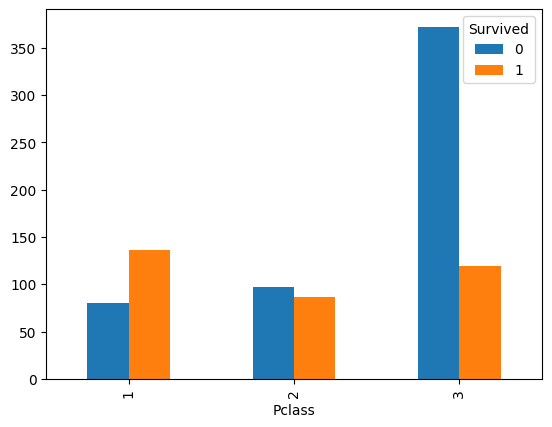

In [46]:
from matplotlib import pyplot as plt
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar')